In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
P = 1000000      # Principal (Rs. 10 lakhs)
C = 0.08         # Annual coupon rate 8%
n = 10 * 2       # 10 years × 2 = 20 periods
r = 0.08 / 2     # YTM per period = 4%
PMT = P * C / 2

In [3]:
numerator = 0
denominator = 0

for t in range(1, n + 1):
    if t == n:
        CF = PMT + P  # Last payment includes principal
    else:
        CF = PMT

    PV = CF / (1 + r)**t
    numerator += t * PV
    denominator += PV

Duration = (numerator / denominator) / 2  # Convert to years

print(f"Duration = {Duration:.2f} years")

Duration = 7.07 years


In [4]:
maturities = np.array([0,0.5, 1,1.5, 2, 2.5, 3, 3.5, 4,4.5, 5, 5.5,6])

In [5]:
zero_rates = np.array([0.0543, 0.0552, 0.056, 0.0568, 0.0567, 0.0583, 0.0591, .0597, 0.0604, .0611, 0.0617, 0.0623, 0.0629 ])

In [6]:
df = pd.DataFrame({
    "Maturity (yrs)": maturities,
    "Zero Rate": zero_rates })

Interpolated rates: [0.0597 0.0611 0.0623]
Discount factors: [0.81143581 0.7596101  0.70988663]


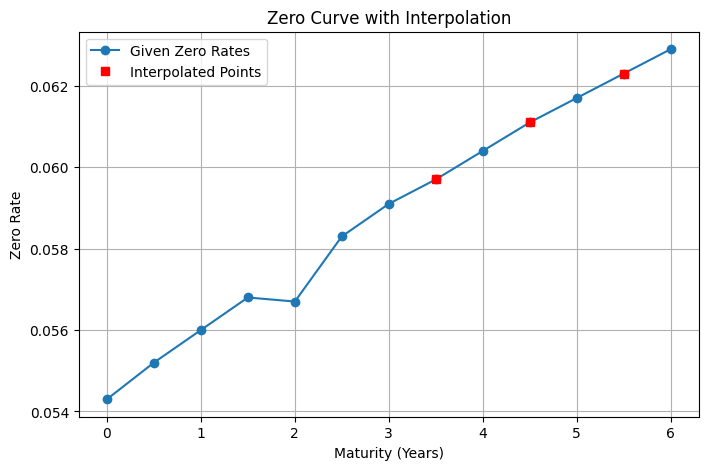

In [8]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
# Interpolator on zero rates
interp = interp1d(maturities, zero_rates, kind="linear", fill_value="extrapolate")

# target maturities
target_T = np.array([3.5, 4.5, 5.5])
target_rates = interp(target_T)

# discount factors for target maturities
target_df = np.exp(-target_rates * target_T)

print("Interpolated rates:", target_rates)
print("Discount factors:", target_df)
plt.figure(figsize=(8,5))
plt.plot(maturities, zero_rates, 'o-', label="Given Zero Rates")
plt.plot(target_T, target_rates, 's', color="red", label="Interpolated Points")
plt.xlabel("Maturity (Years)")
plt.ylabel("Zero Rate")
plt.title("Zero Curve with Interpolation")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
rates = {
    1: 0.0560,
    2: 0.0567,
    3: 0.0591,
    4: 0.0604,
    5: 0.0617
}

In [12]:
import numpy as np

# Bond Details
P = 1000000          # Principal Rs. 10 lakhs
coupon_rate = 0.08   # 8% annual
coupon = P * coupon_rate / 2  # Semi-annual = 40,000

# Rates at 1Y, 2Y, 3Y, 4Y, 5Y from your data
rates = {
    1: 0.0560,
    2: 0.0567,
    3: 0.0591,
    4: 0.0604,
    5: 0.0617
}

def bond_price(ytm, maturity_years):
    """Calculate bond price given YTM and maturity"""
    n = maturity_years * 2  # Semi-annual periods
    r = ytm / 2  # Semi-annual rate

    price = 0
    for t in range(1, n + 1):
        cf = coupon if t < n else coupon + P
        price += cf / (1 + r)**t
    return price

def modified_duration(ytm, maturity_years):
    """Calculate modified duration"""
    n = maturity_years * 2
    r = ytm / 2

    numerator = 0
    denominator = 0

    for t in range(1, n + 1):
        cf = coupon if t < n else coupon + P
        pv = cf / (1 + r)**t
        numerator += t * pv
        denominator += pv

    macaulay = (numerator / denominator) / 2  # Convert to years
    modified = macaulay / (1 + r)
    return modified

# Calculate DV01 for each maturity point
print("DV01 CALCULATION ACROSS YIELD CURVE POINTS")
print("=" * 70)
print(f"{'Maturity':<12} {'YTM':<10} {'Price':<15} {'Mod Dur':<12} {'DV01':<12}")
print("=" * 70)

dv01_results = {}

for year, ytm in rates.items():
    price = bond_price(ytm, 10)  # 10-year bond priced at different rates
    mod_dur = modified_duration(ytm, 10)
    dv01 = (mod_dur * price) / 10000

    dv01_results[year] = dv01

    print(f"{year}Y{' '*10}{ytm*100:.2f}%{' '*5}₹{price:,.2f}{' '*3}{mod_dur:.4f}{' '*6}₹{dv01:.2f}")

print("=" * 70)
print(f"\nNote: DV01 = Change in bond value for 1 basis point (0.01%) change in yield")

DV01 CALCULATION ACROSS YIELD CURVE POINTS
Maturity     YTM        Price           Mod Dur      DV01        
1Y          5.60%     ₹1,181,876.10   7.1295      ₹842.62
2Y          5.67%     ₹1,175,996.45   7.1198      ₹837.29
3Y          5.91%     ₹1,156,118.42   7.0865      ₹819.29
4Y          6.04%     ₹1,145,530.02   7.0685      ₹809.72
5Y          6.17%     ₹1,135,065.23   7.0504      ₹800.27

Note: DV01 = Change in bond value for 1 basis point (0.01%) change in yield
